In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [0]:
train = train.loc[:, train.max() != train.min()]
test = test.loc[:, test.max() != test.min()]

In [0]:
train['Y18'].isnull().sum(), train['Y18'].notnull().sum()
train_first_30 = train[train['Y18'].isnull()]
train_first_30.shape
train_later_3 = train[train['Y18'].notnull()]
train_later_3.shape

(432, 57)

In [0]:

X_train = train_first_30.loc[:, 'X00':'X39']
X_train
X_train = pd.concat([X_train, X_train], axis=0)
X_train = pd.concat([X_train, train_later_3.loc[:, 'X00':'X39']], axis=0)
X_train = pd.concat([X_train, train_later_3.loc[:,"X00":"X39"]],axis=0)


In [0]:
def momentValue(df, columns):
    for column in columns:
        temp_df = pd.DataFrame(df[column])
        temp_df['dummy'] = 0
        
        for i in range(1, temp_df.shape[0]):
            a = temp_df[column].iloc[i] - temp_df[column].iloc[i-1]
            if a > 0:
                temp_df['dummy'].iloc[i] = a
        
        df[column] = temp_df['dummy']
    
    return df

In [0]:
X_train = momentValue(X_train,['X11','X34'])
X_train = momentValue(X_train,['X04','X10','X21','X36','X39'])
test = momentValue(test,['X11','X34'])
test = momentValue(test,['X04','X10','X21','X36','X39'])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
def scale(df,columns):
  for column in columns:
    df[column]=df[columns]/df[columns].max()
  return df



In [0]:
select_Tr = X_train.loc[:,['X13','X15','X17','X25','X35']]
select_Ts = test.loc[:,['X13','X15','X17','X25','X35']]
stand_Tr = X_train.loc[:,['X00','X01','X02','X03','X04','X05','X06','X07','X08','X09','X10','X11','X12','X18','X20','X21','X22','X23','X24','X26','X27','X28','X29','X30','X31','X32','X33','X34','X37','X38','X39']]
stand_Ts = test.loc[:,['X00','X01','X02','X03','X04','X05','X06','X07','X08','X09','X10','X11','X12','X18','X20','X21','X22','X23','X24','X26','X27','X28','X29','X30','X31','X32','X33','X34','X37','X38','X39']]


In [0]:
scale(select_Tr,['X13','X15','X17','X25','X35'])
scale(select_Ts,['X13','X15','X17','X25','X35'])

,X13,X15,X17,X25,X35
0,0.926924,0.926924,0.926924,0.926924,0.926924
1,0.932203,0.932203,0.932203,0.932203,0.932203
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.702695,0.702695,0.702695,0.702695,0.702695
4,0.661851,0.661851,0.661851,0.661851,0.661851
...,...,...,...,...,...
11515,0.182273,0.182273,0.182273,0.182273,0.182273
11516,0.144207,0.144207,0.144207,0.144207,0.144207
11517,0.080578,0.080578,0.080578,0.080578,0.080578
11518,0.083356,0.083356,0.083356,0.083356,0.083356


In [0]:
#표준화 함수 생성
def standardization(df):
    mean = np.mean(df)
    std = np.std(df)
    norm = (df - mean) / (std - 1e-07)
    return norm, mean, std

In [0]:
# 학습데이터 표준화
X_train_norm, mean, std = standardization(stand_Tr)

In [0]:
y_train = train_first_30.loc[:, 'Y16']
y_train = pd.concat([y_train, y_train], axis=0)
y_train = pd.concat([y_train, train_later_3.loc[:, 'Y18']], axis=0)
y_train = pd.concat([y_train, train_later_3.loc[:,"Y18"]],axis=0)

In [0]:
X_test_norm = (stand_Ts - mean) / (std - 1e-07)

In [0]:
X_train_norm = pd.concat([X_train_norm,select_Tr],axis=1)
X_test_norm = pd.concat([X_test_norm,select_Ts],axis=1)

In [0]:
# ID로 시간 변수 생성
minute = pd.Series((X_train_norm.index%144).astype(int))
hour= pd.Series((X_train_norm.index%144/6).astype(int))

# 삼각함수를 이용한 시간변수 생성
min_in_day = 24*6
hour_in_day = 24

minute_sin = np.sin(np.pi*minute/min_in_day) 
minute_cos = np.cos(np.pi*minute/min_in_day)

hour_sin  = np.sin(np.pi*hour/hour_in_day)
hour_cos  = np.cos(np.pi*hour/hour_in_day)

X_train_norm['minute_sin'] = minute_sin
X_train_norm['minute_cos'] = minute_cos

X_train_norm['hour_sin'] = hour_sin
X_train_norm['hour_cos'] = hour_cos
X_train_norm

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X18,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X37,X38,X39,X13,X15,X17,X25,X35,minute_sin,minute_cos,hour_sin,hour_cos
0,-2.236613,0.053249,-0.289028,-0.911441,-0.133158,0.284592,0.174800,-2.160980,0.315249,0.396477,-0.12732,-0.794483,0.637025,-0.932947,0.894310,-0.117209,0.215838,0.277710,0.105335,-0.701087,0.332281,-2.314698,0.232479,0.159935,-2.110001,-1.766809,0.298012,-0.763008,0.577780,0.240728,-0.125933,0.198056,0.198056,0.198056,0.198056,0.198056,0.000000,1.000000,0.000000,1.000000
1,-2.321591,0.083015,0.177501,0.477370,-0.133158,0.284592,0.174800,-2.183828,0.343658,0.424679,-0.12732,-0.794483,0.583154,-0.846359,0.935541,-0.117209,0.215838,0.306973,-0.902731,-1.104062,0.332281,-2.362038,0.261979,0.215689,-2.091884,-1.842695,0.298012,-0.763008,0.582902,0.289731,-0.125933,0.338333,0.338333,0.338333,0.338333,0.338333,0.021815,0.999762,0.000000,1.000000
2,-2.300347,0.112780,-0.382334,0.904697,-0.133158,0.255134,0.204183,-2.183828,0.372068,0.481084,-0.12732,-0.794483,0.803125,-0.673184,0.999678,-0.117209,0.186142,0.277710,-0.902731,-1.104062,0.303262,-2.362038,0.232479,0.271442,-2.146235,-1.956524,0.268945,-0.763008,0.582902,0.311510,-0.125933,0.644444,0.644444,0.644444,0.644444,0.644444,0.043619,0.999048,0.000000,1.000000
3,-2.300347,0.083015,-0.009111,-0.804610,-0.133158,0.255134,0.174800,-2.206676,0.343658,0.452881,-0.12732,-0.794483,0.874952,-1.106121,1.004260,-0.117209,0.186142,0.248447,-0.902731,-0.942872,0.332281,-2.362038,0.202979,0.350426,-2.200586,-2.013438,0.298012,-0.763008,0.593145,0.344178,-0.125933,0.000000,0.000000,0.000000,0.000000,0.000000,0.065403,0.997859,0.000000,1.000000
4,-2.342836,0.083015,-0.662251,0.263707,-0.133158,0.255134,0.204183,-2.206676,0.372068,0.452881,-0.12732,-0.794483,0.928822,-1.192709,1.036328,-0.117209,0.186142,0.248447,-0.902731,-1.104062,0.332281,-2.385708,0.202979,0.401533,-2.254937,-2.013438,0.298012,-0.763008,0.618753,0.371402,-0.125933,0.000000,0.000000,0.000000,0.000000,0.000000,0.087156,0.996195,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,-0.069662,-0.303940,-0.568945,-0.697778,-0.133158,-0.422397,-0.383472,0.009578,-0.366580,-0.280379,-0.12732,-0.794483,1.216131,-0.413422,0.834754,-0.117209,-0.407792,-0.395341,-0.902731,-0.136920,-0.451211,0.407351,-0.416518,1.126324,-0.388886,-0.173206,-0.457735,-0.763008,0.838982,0.022938,-0.125933,0.925278,0.925278,0.925278,0.925278,0.925278,0.108867,-0.994056,0.130526,-0.991445
4748,-0.069662,-0.303940,-0.942168,-0.804610,-0.133158,-0.451855,-0.383472,-0.013270,-0.366580,-0.280379,-0.12732,-0.794483,1.229598,-0.326835,0.853079,-0.117209,-0.437489,-0.395341,-0.902731,-0.056325,-0.451211,0.360011,-0.416518,1.191369,-0.388886,-0.154235,-0.457735,-0.763008,0.849226,0.050162,-0.125933,0.601111,0.601111,0.601111,0.601111,0.601111,0.087156,-0.996195,0.130526,-0.991445
4749,-0.112151,-0.274175,-0.568945,-0.911441,-0.133158,-0.422397,-0.412855,-0.058966,-0.394989,-0.252177,-0.12732,-0.794483,1.243066,-0.673184,0.885147,-0.117209,-0.407792,-0.366078,-0.902731,-0.942872,-0.451211,0.360011,-0.387018,1.140262,-0.370769,-0.154235,-0.457735,-0.763008,0.874834,0.039273,-0.125933,0.355000,0.355000,0.355000,0.355000,0.355000,0.065403,-0.997859,0.130526,-0.991445
4750,-0.175885,-0.274175,-0.568945,-0.697778,-0.133158,-0.422397,-0.354090,-0.081814,-0.338170,-0.252177,-0.12732,-0.794483,1.243066,-0.673184,0.917216,-0.117209,-0.407792,-0.366078,-0.902731,-1.023467,-0.451211,0.289001,-0.387018,1.135616,-0.388886,-0.135263,-0.428667,-0.763008,0.885077,0.088275,-0.125933,0.899444,0.899444,0.899444,0.899444,0.899444,0.043619,-0.999048,0.130526,-0.991445


In [0]:

# ID로 시간 변수 생성
minute = pd.Series((test.id%144).astype(int))
hour= pd.Series((test.id%144/6).astype(int))

# 삼각함수를 이용한 시간변수 생성
min_in_day = 24*6
hour_in_day = 24

minute_sin = np.sin(np.pi*minute/min_in_day) 
minute_cos = np.cos(np.pi*minute/min_in_day)

hour_sin  = np.sin(np.pi*hour/hour_in_day)
hour_cos  = np.cos(np.pi*hour/hour_in_day)

In [0]:
X_test_norm['minute_sin'] = minute_sin
X_test_norm['minute_cos'] = minute_cos

X_test_norm['hour_sin'] = hour_sin
X_test_norm['hour_cos'] = hour_cos
X_test_norm

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X18,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X37,X38,X39,X13,X15,X17,X25,X35,minute_sin,minute_cos,hour_sin,hour_cos
0,-0.324597,-0.363472,-0.009111,-0.163620,-0.133158,-0.451855,-0.383472,-0.127510,-0.366580,-0.336784,-0.12732,-0.794483,1.252044,-0.240247,1.063816,-0.117209,-0.437489,-0.366078,-0.902731,-1.023467,-0.451211,0.265331,-0.387018,1.196016,-0.425120,-0.154235,-0.428667,-0.763008,0.926050,0.093720,-0.125933,0.926924,0.926924,0.926924,0.926924,0.926924,0.000000,1.000000,0.000000,1.000000
1,-0.303353,-0.363472,-0.382334,-0.270451,-0.133158,-0.481312,-0.383472,-0.104662,-0.366580,-0.336784,-0.12732,-0.794483,1.256533,-0.673184,1.091303,-0.117209,-0.467185,-0.395341,-0.902731,-0.862277,-0.480229,0.241661,-0.416518,1.205308,-0.443237,-0.173206,-0.457735,-0.763008,0.926050,0.126389,-0.125933,0.932203,0.932203,0.932203,0.932203,0.932203,0.021815,0.999762,0.000000,1.000000
2,-0.260864,-0.363472,-0.195722,-0.270451,-0.133158,-0.510770,-0.412855,-0.104662,-0.394989,-0.336784,-0.12732,-0.794483,1.265512,-1.192709,1.027166,-0.117209,-0.496882,-0.424604,-0.902731,-0.539896,-0.480229,0.241661,-0.446017,1.223892,-0.479471,-0.192178,-0.457735,-0.763008,0.977266,0.142723,-0.125933,0.000000,0.000000,0.000000,0.000000,0.000000,0.043619,0.999048,0.000000,1.000000
3,-0.324597,-0.363472,0.737335,-0.697778,-0.133158,-0.510770,-0.412855,-0.127510,-0.394989,-0.336784,-0.12732,-0.794483,1.270001,-0.846359,1.050072,-0.117209,-0.496882,-0.424604,-0.902731,-0.620491,-0.509248,0.170651,-0.446017,1.270353,-0.479471,-0.230121,-0.486802,-0.763008,1.018239,0.164502,-0.125933,0.702695,0.702695,0.702695,0.702695,0.702695,0.065403,0.997859,0.000000,1.000000
4,-0.388331,-0.363472,-0.382334,-0.804610,-0.133158,-0.481312,-0.383472,-0.173206,-0.366580,-0.336784,-0.12732,-0.794483,1.274490,-0.500009,1.109628,-0.117209,-0.467185,-0.453867,-0.902731,-0.539896,-0.480229,0.170651,-0.475517,1.237830,-0.443237,-0.211149,-0.457735,-0.763008,1.095063,0.191725,-0.125933,0.661851,0.661851,0.661851,0.661851,0.661851,0.087156,0.996195,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,1.162526,1.362943,2.230228,2.507172,-0.133158,0.991581,1.408876,1.060584,1.281173,1.186142,-0.12732,-0.794483,0.892909,0.365865,0.266680,-0.117209,1.017649,1.184866,0.563546,2.522721,1.144790,1.330481,1.205973,0.508393,0.680016,0.832281,1.140960,-0.763008,0.705821,0.507520,-0.125933,0.182273,0.182273,0.182273,0.182273,0.182273,0.108867,-0.994056,0.130526,-0.991445
11516,1.141281,1.362943,1.390476,1.652519,-0.133158,0.991581,1.408876,1.060584,1.281173,1.186142,-0.12732,-0.794483,0.327270,1.318326,0.303330,-0.117209,1.017649,1.184866,0.838473,2.683911,1.115772,1.306811,1.205973,0.513039,0.988005,0.832281,1.111893,-0.763008,0.700699,0.529299,-0.125933,0.144207,0.144207,0.144207,0.144207,0.144207,0.087156,-0.996195,0.130526,-0.991445
11517,1.141281,1.362943,2.136922,1.118360,-0.133158,1.050496,1.379494,1.037737,1.252763,1.214344,-0.12732,-0.794483,0.417054,1.318326,0.339980,-0.117209,1.077042,1.214129,1.205042,2.764506,1.115772,1.283141,1.235473,0.531623,0.915537,0.813310,1.111893,-0.763008,0.680212,0.551078,-0.125933,0.080578,0.080578,0.080578,0.080578,0.080578,0.065403,-0.997859,0.130526,-0.991445
11518,1.120037,1.362943,0.830641,1.438855,-0.133158,1.021039,1.379494,1.014889,1.252763,1.186142,-0.12732,-0.794483,0.264421,1.751263,0.376630,-0.117209,1.047345,1.214129,0.655189,1.716769,1.115772,1.235801,1.235473,0.540916,0.988005,0.794338,1.111893,-0.763008,0.726307,0.578302,-0.125933,0.083356,0.083356,0.083356,0.083356,0.083356,0.043619,-0.999048,0.130526,-0.991445


In [0]:
X_train_norm = X_train_norm.loc[:, X_train_norm.max() != X_train_norm.min()]
X_test_norm = X_test_norm.loc[:, X_test_norm.max() != X_test_norm.min()]
len(X_test_norm.columns) == len(X_train_norm.columns)

True

In [0]:

# 실제값과 예측값의 차이가 1보다 작은 건 무시하는 Custom MSE Metric
def mse1(y_pred, y_true):

    diff = abs(y_true - y_pred)
    mask_less_than_one = np.array([0 if x < 1 else 1 for x in diff])

    y_pred = mask_less_than_one * y_pred
    y_true = mask_less_than_one *y_true
    
    score =  mean_squared_error(y_true, y_pred)
    
    return 'score', score, False

In [0]:
X_train_30 = X_train_norm.iloc[:4320+4320,:]
y_train_30 = y_train.iloc[:4320+4320]
X_train_3 = X_train_norm.iloc[4320+4320:,:]
y_train_3 = y_train.iloc[4320+4320:]

In [0]:
import_30 = [
                    'X30',
                    'X00',
                    'X38',
                    'X20',
                    'X32',
                    'X37',
                    'X34',
                    'X07',
                    'X12','X13','X31','X11','X28','X18','minute_sin','X26','X02','X03','minute_cos','X01'
                    ]
                    #minute_sin,X37,minute_cos,X07,X38,X01,X20,X31,X11,X00,X29,hour_cos

In [0]:
#import_3 = ['minute_sin','X37','minute_cos','X07','X38','X01','X20','X11','X31','X00','X29','hour_cos']

In [0]:
X_train_30 =X_train_30[import_30]

X_train_3 = X_train_3[import_30]
test = X_test_norm[import_30]

In [0]:
pip install bayesian-optimization

In [0]:
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train_30,y_train_30,test_size=0.4,shuffle=True)

dtrain=xgb.DMatrix(X_train, label=y_train)
del(X_train)
dtest = xgb.DMatrix(X_test)
del(X_test)
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'mae',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'learning_rate':0.007,
              'nthread':10,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree,
              'seed':77}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=5)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-mae-mean'].iloc[-1]
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=5, n_iter=10, acq='ei')

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
|  1        | -11.13    |  0.4022   |  0.07839  |  3.097    |
|  2        | -11.15    |  0.4295   |  0.5186   |  5.159    |
|  3        | -11.15    |  0.4834   |  0.8499   |  5.234    |
|  4        | -11.13    |  0.7748   |  0.7406   |  3.478    |
|  5        | -11.15    |  0.469    |  0.4793   |  4.503    |
|  6        | -11.13    |  0.8641   |  0.9768   |  3.004    |
|  7        | -11.13    |  0.8949   |  0.1587   |  3.033    |
|  8        | -11.14    |  0.3362   |  0.9971   |  3.001    |
|  9        | -11.13    |  0.8946   |  0.1526   |  3.039    |
|  10       | -11.13    |  0.8635   |  0.02747  |  3.034    |
|  11       | -11.13    |  0.8995   |  0.01926  |  3.014    |
|  12       | -11.13    |  0.8831   |  0.6526   |  3.003    |
|  13       | -11.13    |  0.8978   |  0.1711   |  3.009    |
|  14       | -11.13    |  0.8865   |  0.1582   |  3.014    |
|  15   

In [0]:
targets = []
for i, rs in enumerate(xgb_bo.res):
    targets.append(rs["target"])
best_params = xgb_bo.res[targets.index(max(targets))]["params"]
best_params["max_depth"] = int(best_params["max_depth"])

In [0]:
model2 = xgb.train(best_params, dtrain, num_boost_round=2500,feval=mse1)

# Predict on testing and training set
y_pred = model2.predict(dtest)
y_train_pred = model2.predict(dtrain)

# Report testing and training RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))

0.5261280436187404
0.1547636558686163


In [0]:
import numpy as np

def mse_AIFrenz(y_true, y_pred):
    '''
    y_true: 실제 값
    y_pred: 예측 값
    '''
    diff = abs(y_true - y_pred)
    
    less_then_one = np.where(diff < 1, 0, diff)
    
    # multi-column일 경우에도 계산 할 수 있도록 np.average를 한번 더 씌움
    score = np.average(np.average(less_then_one ** 2, axis = 0))
    
    return score

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train_3,y_train_3,test_size=0.4,shuffle=True)

dtrain=xgb.DMatrix(X_train, label=y_train)
del(X_train)
dtest = xgb.DMatrix(X_test)
del(X_test)
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'mae',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'learning_rate':0.007,
              'nthread':10,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree,
              'seed':77}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=5)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-mae-mean'].iloc[-1]
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=5, n_iter=10, acq='ei')

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
|  1        | -13.11    |  0.4801   |  0.676    |  3.44     |
|  2        | -13.11    |  0.8919   |  0.192    |  5.42     |
|  3        | -13.11    |  0.3564   |  0.04252  |  3.439    |
|  4        | -13.12    |  0.7552   |  0.967    |  3.556    |
|  5        | -13.11    |  0.4821   |  0.6288   |  6.807    |
|  6        | -13.11    |  0.4609   |  0.5291   |  6.992    |
|  7        | -13.12    |  0.7977   |  0.2257   |  6.99     |
|  8        | -13.12    |  0.4022   |  0.3702   |  3.156    |
|  9        | -13.11    |  0.6667   |  0.1377   |  6.933    |
|  10       | -13.11    |  0.5995   |  0.9193   |  6.812    |
|  11       | -13.12    |  0.6164   |  0.8327   |  6.911    |
|  12       | -13.11    |  0.675    |  0.0736   |  3.07     |
|  13       | -13.11    |  0.3375   |  0.6466   |  3.041    |
|  14       | -13.11    |  0.8531   |  0.8276   |  3.002    |
|  15   

In [0]:
targets = []
for i, rs in enumerate(xgb_bo.res):
    targets.append(rs["target"])
best_params = xgb_bo.res[targets.index(max(targets))]["params"]
best_params["max_depth"] = int(best_params["max_depth"])

In [0]:
model3 = xgb.train(best_params, dtrain, num_boost_round=2500,feval=mse1)

# Predict on testing and training set
y_pred = model3.predict(dtest)
y_train_pred = model3.predict(dtrain)

# Report testing and training RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))

0.63093134614087
0.23671674648831398


In [0]:
print(mse_AIFrenz(y_test,y_pred))
print(mse_AIFrenz(y_train,y_train_pred))

0.2733891038503048
0.004002889037359756


In [0]:
test

,X30,X00,X38,X20,X32,X37,X34,X07,X12,X13,X31,X11,X28,X18,minute_sin,X26,X02,X03,minute_cos,X01
0,1.196016,-0.324597,0.093720,1.063816,-0.154235,0.926050,-0.763008,-0.127510,1.252044,0.926924,-0.425120,-0.794483,0.265331,-0.240247,0.000000,-1.023467,-0.009111,-0.163620,1.000000,-0.363472
1,1.205308,-0.303353,0.126389,1.091303,-0.173206,0.926050,-0.763008,-0.104662,1.256533,0.932203,-0.443237,-0.794483,0.241661,-0.673184,0.021815,-0.862277,-0.382334,-0.270451,0.999762,-0.363472
2,1.223892,-0.260864,0.142723,1.027166,-0.192178,0.977266,-0.763008,-0.104662,1.265512,0.000000,-0.479471,-0.794483,0.241661,-1.192709,0.043619,-0.539896,-0.195722,-0.270451,0.999048,-0.363472
3,1.270353,-0.324597,0.164502,1.050072,-0.230121,1.018239,-0.763008,-0.127510,1.270001,0.702695,-0.479471,-0.794483,0.170651,-0.846359,0.065403,-0.620491,0.737335,-0.697778,0.997859,-0.363472
4,1.237830,-0.388331,0.191725,1.109628,-0.211149,1.095063,-0.763008,-0.173206,1.274490,0.661851,-0.443237,-0.794483,0.170651,-0.500009,0.087156,-0.539896,-0.382334,-0.804610,0.996195,-0.363472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,0.508393,1.162526,0.507520,0.266680,0.832281,0.705821,-0.763008,1.060584,0.892909,0.182273,0.680016,-0.794483,1.330481,0.365865,0.108867,2.522721,2.230228,2.507172,-0.994056,1.362943
11516,0.513039,1.141281,0.529299,0.303330,0.832281,0.700699,-0.763008,1.060584,0.327270,0.144207,0.988005,-0.794483,1.306811,1.318326,0.087156,2.683911,1.390476,1.652519,-0.996195,1.362943
11517,0.531623,1.141281,0.551078,0.339980,0.813310,0.680212,-0.763008,1.037737,0.417054,0.080578,0.915537,-0.794483,1.283141,1.318326,0.065403,2.764506,2.136922,1.118360,-0.997859,1.362943
11518,0.540916,1.120037,0.578302,0.376630,0.794338,0.726307,-0.763008,1.014889,0.264421,0.083356,0.988005,-0.794483,1.235801,1.751263,0.043619,1.716769,0.830641,1.438855,-0.999048,1.362943


In [0]:
X_test_norm = xgb.DMatrix(test)
predict_30 = model2.predict(X_test_norm)
predict_3 = model3.predict(X_test_norm)

In [0]:
ensembled_preds = 0.6 * predict_30 + 0.4 * predict_3

submit = pd.DataFrame({'id':range(144*33, 144*113),
              'Y18':ensembled_preds})
submit.to_csv('6:4d.csv', index = False)

In [0]:
submit.max()

id     16271.000000
Y18       40.404266
dtype: float64

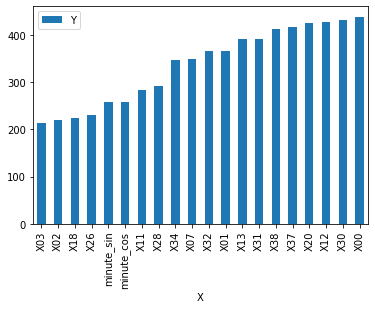

In [0]:
import matplotlib.pyplot as plt
fscores = pd.DataFrame({'X': list(model2.get_fscore().keys()), 'Y': list(model2.get_fscore().values())})
fscores.sort_values(by='Y').plot.bar(x='X')

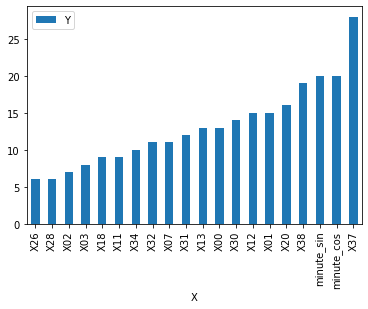

In [0]:
import matplotlib.pyplot as plt
fscores = pd.DataFrame({'X': list(model3.get_fscore().keys()), 'Y': list(model3.get_fscore().values())})
fscores.sort_values(by='Y').plot.bar(x='X')